In [187]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

df1 = pd.read_csv('data/data.part1.csv',index_col=0)
df2 = pd.read_csv('data/data.part2.csv',index_col=0)
df = pd.concat([df1,df2])

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [188]:
# create a Pandas Series with index as the date and data as the mean price in that day
df['date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
df['date'] = pd.to_datetime(df['date'])
group = df.groupby('date')
X = group.Weighted_Price.mean()
X.to_csv('price.csv')
X = (X/X.shift() - 1)
y = (y/y.shift() - 1)

In [158]:
print(X.head())
Y_baseline = X.shift(1)

date
2014-12-01         NaN
2014-12-02    0.024996
2014-12-03    0.005160
2014-12-04    0.000289
2014-12-06    0.000022
Name: Weighted_Price, dtype: float64


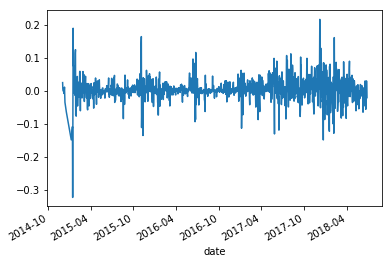

In [159]:
X.plot()

In [160]:
X = X.loc['2015':'2018']
y = Y_baseline.loc['2015':'2018']


In [161]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X,y)

0.0018184376670333552

In [162]:
# for train test split we will take Mar, Apr and May 2018 as the test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=False,test_size=0.2)
print(X_train.shape)

(1009,)


In [163]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
X_train_rs = X_train.values.reshape(-1,1)
X_test_rs = X_test.values.reshape(-1,1)
X_train_sc = mx.fit_transform(X_train_rs)
X_test_sc = mx.transform(X_test_rs)

In [164]:
X_train_sc_df = pd.DataFrame(X_train_sc,columns=['Price'])
X_test_sc_df = pd.DataFrame(X_test_sc,columns=['Price'])
X_train_sc_df.describe()
print(X_train_sc_df.shape[1:])

(1,)


In [165]:
window_size = 30 # days
for s in np.arange(1,window_size+1):
    X_train_sc_df['shift_{}'.format(s)] = X_train_sc_df['Price'].shift(s)
    X_test_sc_df['shift_{}'.format(s)] = X_test_sc_df['Price'].shift(s)

In [166]:
X_train_sc_df.head(n=30)

,Price,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,...,shift_21,shift_22,shift_23,shift_24,shift_25,shift_26,shift_27,shift_28,shift_29,shift_30
0,0.340338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.418115,0.340338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000000,0.418115,0.340338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.480443,0.000000,0.418115,0.340338,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.000000,0.480443,0.000000,0.418115,0.340338,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.781777,1.000000,0.480443,0.000000,0.418115,0.340338,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.769609,0.781777,1.000000,0.480443,0.000000,0.418115,0.340338,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.614910,0.769609,0.781777,1.000000,0.480443,0.000000,0.418115,0.340338,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.649346,0.614910,0.769609,0.781777,1.000000,0.480443,0.000000,0.418115,0.340338,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.681245,0.649346,0.614910,0.769609,0.781777,1.000000,0.480443,0.000000,0.418115,0.340338,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
X_train_final = X_train_sc_df.values.reshape(-1, 31, 1)
X_train_final = X_train_final[30:]
y_train = y_train[30:]
X_test_final = X_test_sc_df.values.reshape(-1,31,1)

In [168]:
X_test_final.shape

(253, 31, 1)

In [189]:
from keras.layers import Dense, Activation, CuDNNLSTM, Dropout
from keras import Sequential
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(CuDNNLSTM(12,input_shape=(31,1),return_sequences=True))
model.add(Dropout(0.2))
model.add(CuDNNLSTM(12))
model.add(Dropout(0.2))
model.add(Dense(1,activation='tanh'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_22 (CuDNNLSTM)    (None, 31, 12)            720       
_________________________________________________________________
dropout_13 (Dropout)         (None, 31, 12)            0         
_________________________________________________________________
cu_dnnlstm_23 (CuDNNLSTM)    (None, 12)                1248      
_________________________________________________________________
dropout_14 (Dropout)         (None, 12)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 13        
Total params: 1,981
Trainable params: 1,981
Non-trainable params: 0
_________________________________________________________________


In [190]:
model.compile(optimizer='adam',loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss',patience=3,verbose=1)

In [191]:
h = model.fit(X_train_final,y_train,epochs=200,batch_size=100,callbacks=[early_stop],verbose=1)

Epoch 1/200
979/979 [==============================] - 1s 994us/step - loss: 0.0102
Epoch 2/200
979/979 [==============================] - 0s 167us/step - loss: 0.0035
Epoch 3/200
979/979 [==============================] - 0s 165us/step - loss: 0.0023
Epoch 4/200
979/979 [==============================] - 0s 172us/step - loss: 0.0016
Epoch 5/200
979/979 [==============================] - 0s 173us/step - loss: 0.0012
Epoch 6/200
979/979 [==============================] - 0s 172us/step - loss: 0.0011
Epoch 7/200
979/979 [==============================] - 0s 170us/step - loss: 0.0010
Epoch 8/200
979/979 [==============================] - 0s 172us/step - loss: 9.4994e-04
Epoch 9/200
979/979 [==============================] - 0s 172us/step - loss: 9.9345e-04
Epoch 10/200
979/979 [==============================] - 0s 172us/step - loss: 9.7900e-04
Epoch 11/200
979/979 [==============================] - 0s 166us/step - loss: 8.9722e-04
Epoch 12/200
979/979 [==============================] - 0s

In [192]:
model.evaluate(X_train_final,y_train)

979/979 [==============================] - 0s 501us/step


0.000766427786635526

In [193]:
model.evaluate(X_test_final[30:],y_test[30:])

223/223 [==============================] - 0s 232us/step


0.0022778806329867697

In [194]:
y_pred = model.predict(X_test_final[30:])
y_pred.shape

(223, 1)

No handles with labels found to put in legend.


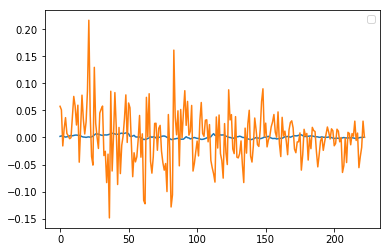

In [203]:

plt.plot(pd.DataFrame(y_pred,columns=['prediction']))
plt.plot(pd.DataFrame(y_test[30:].values,columns=['actual']))
plt.legend()